<a href="https://colab.research.google.com/github/nallapaneni991001/Diabetes-Prediction-ML/blob/Diabetes_Prediction/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length{length} bytes'.format(name=fn,length=len(uploaded[fn])))

Saving diabetes.csv to diabetes.csv
User uploaded file "diabetes.csv" with length23106 bytes


In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Importing the dataset
dataset = pd.read_csv('diabetes.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 8].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,
                                                    random_state = 42)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#svm with grid search
svm = SVC(random_state = 42)
parameters = {'kernel':('linear', 'rbf'), 'C':(1,0.25,0.5,0.75),
              'gamma': (1,2,3,'auto'),'decision_function_shape':('ovo','ovr'),
              'shrinking':(True,False)}

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    svm = GridSearchCV(SVC(), parameters, cv=5,
                       scoring='%s_macro' % score)
    svm.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(svm.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = svm.cv_results_['mean_test_score']
    stds = svm.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, svm.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, svm.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

svm_model = SVC(kernel='rbf', C=100, gamma = 0.0001, random_state=42)
svm_model.fit(X_train, y_train)
spred = svm_model.predict(X_test)
print ('Accuracy with SVM {0}'.format(accuracy_score(spred, y_test) * 100))


# Making the Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print('TP - True Negative {}'.format(cm[0,0]))
print('FP - False Positive {}'.format(cm[0,1]))
print('FN - False Negative {}'.format(cm[1,0]))
print('TP - True Positive {}'.format(cm[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))))

round(roc_auc_score(y_test,y_pred),5)

# Tuning hyper-parameters for precision



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Pr

Best parameters set found on development set:

{'C': 0.5, 'decision_function_shape': 'ovo', 'gamma': 1, 'kernel': 'rbf', 'shrinking': True}

Grid scores on development set:

0.751 (+/-0.081) for {'C': 1, 'decision_function_shape': 'ovo', 'gamma': 1, 'kernel': 'linear', 'shrinking': True}
0.751 (+/-0.081) for {'C': 1, 'decision_function_shape': 'ovo', 'gamma': 1, 'kernel': 'linear', 'shrinking': False}
0.679 (+/-0.070) for {'C': 1, 'decision_function_shape': 'ovo', 'gamma': 1, 'kernel': 'rbf', 'shrinking': True}
0.679 (+/-0.070) for {'C': 1, 'decision_function_shape': 'ovo', 'gamma': 1, 'kernel': 'rbf', 'shrinking': False}
0.751 (+/-0.081) for {'C': 1, 'decision_function_shape': 'ovo', 'gamma': 2, 'kernel': 'linear', 'shrinking': True}
0.751 (+/-0.081) for {'C': 1, 'decision_function_shape': 'ovo', 'gamma': 2, 'kernel': 'linear', 'shrinking': False}
0.730 (+/-0.190) for {'C': 1, 'decision_function_shape': 'ovo', 'gamma': 2, 'kernel': 'rbf', 'shrinking': True}
0.730 (+/-0.190) for {'C': 

0.71315

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# Importing the dataset
dataset = pd.read_csv('diabetes.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 8].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,
                                                    random_state = 42)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Parameter evaluation
rfclf = RandomForestClassifier(random_state=42)
parameters={'n_estimators': [50, 100],
            'max_features': ['auto', 'sqrt', 'log2'],
            'max_depth' : [4,5,6,7],
            'criterion' :['gini', 'entropy']
}
gridsearch=GridSearchCV(rfclf, parameters, cv=50, scoring='roc_auc', n_jobs = -1)
gridsearch.fit(X, y)
print(gridsearch.best_params_)
print(gridsearch.best_score_)


rf = RandomForestClassifier(n_estimators=100, criterion = 'gini', max_depth = 6,
                            max_features = 'auto', random_state=0)
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

y_pred = rf.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print('TP - True Negative {}'.format(cm[0,0]))
print('FP - False Positive {}'.format(cm[0,1]))
print('FN - False Negative {}'.format(cm[1,0]))
print('TP - True Positive {}'.format(cm[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))))

round(roc_auc_score(y_test,y_pred),5)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


{'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 100}
0.8438


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy on training set: 0.917
Accuracy on test set: 0.745
TP - True Negative 99
FP - False Positive 24
FN - False Negative 25
TP - True Positive 44
Accuracy Rate: 0.7447916666666666
Misclassification Rate: 0.2552083333333333


0.72128

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier

# Importing the dataset
dataset = pd.read_csv('diabetes.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 8].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,
                                                    random_state = 42)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Parameter evaluation
knnclf = KNeighborsClassifier()
parameters={'n_neighbors': range(1, 20)}
gridsearch=GridSearchCV(knnclf, parameters, cv=100, scoring='roc_auc')
gridsearch.fit(X, y)
print(gridsearch.best_params_)
print(gridsearch.best_score_)

# Fitting K-NN to the Training set
knnClassifier = KNeighborsClassifier(n_neighbors = 18)
knnClassifier.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knnClassifier.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knnClassifier.score(X_test, y_test)))

# Predicting the Test set results
y_pred = knnClassifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print('TP - True Negative {}'.format(cm[0,0]))
print('FP - False Positive {}'.format(cm[0,1]))
print('FN - False Negative {}'.format(cm[1,0]))
print('TP - True Positive {}'.format(cm[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))))

round(roc_auc_score(y_test,y_pred),5)

{'n_neighbors': 19}
0.8076666666666666
Accuracy of K-NN classifier on training set: 0.79
Accuracy of K-NN classifier on test set: 0.71
TP - True Negative 108
FP - False Positive 15
FN - False Negative 40
TP - True Positive 29
Accuracy Rate: 0.7135416666666666
Misclassification Rate: 0.2864583333333333


0.64917

{'learning_rate': 0.05, 'max_depth': 3, 'max_features': 0.5}
0.8399999999999999
Accuracy on training set: 0.882
Accuracy on test set: 0.750
TP - True Negative 96
FP - False Positive 27
FN - False Negative 21
TP - True Positive 48
Accuracy Rate: 0.75
Misclassification Rate: 0.25


0.81313

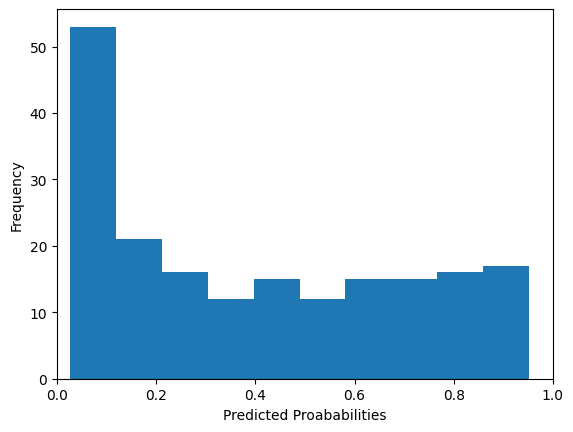

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve


# Importing the dataset
dataset = pd.read_csv('diabetes.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 8].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,
                                                    random_state = 42)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Parameter evaluation with GSC validation
gbe = GradientBoostingClassifier(random_state=42)
parameters={'learning_rate': [0.05, 0.1, 0.5],
            'max_features': [0.5, 1],
            'max_depth': [3, 4, 5]
}
gridsearch=GridSearchCV(gbe, parameters, cv=100, scoring='roc_auc')
gridsearch.fit(X, y)
print(gridsearch.best_params_)
print(gridsearch.best_score_)

# Adjusting development threshold
gbi = GradientBoostingClassifier(learning_rate=0.05, max_depth=3,
                                 max_features=0.5,
                                 random_state=42)
X_train,X_test,y_train, y_test = train_test_split(X, y, random_state=42)
gbi.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbi.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbi.score(X_test, y_test)))

# Storing the prediction
y_pred = gbi.predict_proba(X_test)[:,1]

# Making the Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred.round())

print('TP - True Negative {}'.format(cm[0,0]))
print('FP - False Positive {}'.format(cm[0,1]))
print('FN - False Negative {}'.format(cm[1,0]))
print('TP - True Positive {}'.format(cm[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))))


# Plotting the predictions
plt.hist(y_pred,bins=10)
plt.xlim(0,1)
plt.xlabel("Predicted Proababilities")
plt.ylabel("Frequency")

round(roc_auc_score(y_test,y_pred),5)

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# Importing the dataset
dataset = pd.read_csv('diabetes.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 8].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Parameter evaluation
treeclf = DecisionTreeClassifier(random_state=42)
parameters = {'max_depth': [6, 7, 8, 9],
              'min_samples_split': [2, 3, 4, 5],
              'max_features': [1, 2, 3, 4]
}
gridsearch=GridSearchCV(treeclf, parameters, cv=100, scoring='roc_auc')
gridsearch.fit(X,y)
print(gridsearch.best_params_)
print(gridsearch.best_score_)

# Adjusting development threshold
tree = DecisionTreeClassifier(max_depth = 6, max_features = 4,
                              min_samples_split = 5,
                              random_state=42)
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=42)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

# Predicting the Test set results
y_pred = tree.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print('TP - True Negative {}'.format(cm[0,0]))
print('FP - False Positive {}'.format(cm[0,1]))
print('FN - False Negative {}'.format(cm[1,0]))
print('TP - True Positive {}'.format(cm[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))))

round(roc_auc_score(y_test,y_pred),5)

{'max_depth': 6, 'max_features': 4, 'min_samples_split': 5}
0.7829999999999999
Accuracy on training set: 0.852
Accuracy on test set: 0.729
TP - True Negative 92
FP - False Positive 31
FN - False Negative 21
TP - True Positive 48
Accuracy Rate: 0.7291666666666666
Misclassification Rate: 0.2708333333333333


0.72181